In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Closed_deals

In [2]:
# carga del dataset y muestreo de 10 registros aleatorios
Closed_deals = pd.read_csv('Datasets_original/olist_closed_deals_dataset.csv')
Closed_deals.sample(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
244,a0604c9d9ef23fbf7cb7be5091201041,b7140ce94c4514bf136a2c3f98e0476c,b90f87164b5f8c2cfa5c8572834dbe3f,d3d1e91a157ea7f90548eef82f1955e3,2018-07-31 20:01:32,audio_video_electronics,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0
246,867b587b7c0da5f1af73b47803e60859,d65d93b215feab3f997441e1e0a98ca5,a8387c01a09e99ce014107505b92388c,068066e24f0c643eb1d089c7dd20cd73,2018-05-14 19:26:01,computers,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
603,1dec44d3b8974e86ab337f1755cd893e,7adbd3210a7b3cc2235e225eef33574d,370c9f455f93a9a96cbe9bea48e70033,85fc447d336637ba1df43e793199fbc8,2018-04-10 22:03:57,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
367,abcb67d98a01dcf18478fd47823a8dad,b3a449163f5fe8657f2f0c83f41e7a5a,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-05-21 14:06:49,toys,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
227,bd0c413c4350a9a29fb9bec5de64e2a6,2aeedd049dc20e7171f43110fd0d6821,9d12ef1a7eca3ec58c545c678af7869c,495d4e95a8cf8bbf8b432b612a2aa328,2018-06-13 16:37:42,construction_tools_house_garden,industry,cat,NaN,NaN,NaN,reseller,NaN,0.0
713,7482d965e9c3156079b7ea6423fd41fa,a267686cbbbfe674d0834d3ad95df5bb,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-03-28 16:16:34,health_beauty,industry,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0
150,6dfdc6a7e91f5d20a16c956c33974ca5,3ab971ce71839580d2ae5b4e40fe8044,a8387c01a09e99ce014107505b92388c,2695de1affa7750089c0455f8ce27021,2018-04-27 13:55:14,home_decor,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
612,7a2c5f44c553096c00bd05e62c4f3771,6ebf4eceee4dd9847201c82e77ef8123,09285259593c61296eef10c734121d5b,9ae085775a198122c5586fa830ff7f2b,2018-03-27 14:48:01,health_beauty,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0
510,4532f03593699ffdfd5fc1b58540190e,19d62d484cba71963c93f0f00ab42013,068066e24f0c643eb1d089c7dd20cd73,fbf4aef3f6915dc0c3c97d6812522f6a,2018-03-14 19:43:52,home_decor,online_top,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
831,b3d5cd16656bd872844d94e6c00ac9f3,eeb3e4d4f423780ab2acfe23ea0d5e49,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-03-29 19:37:01,food_supplement,online_small,eagle,NaN,NaN,NaN,reseller,NaN,0.0


In [3]:
# tamaño del dataset
Closed_deals.shape

(842, 14)

In [4]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [5]:
# descripcion de las columnas numéricas
Closed_deals.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [6]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariciones
Closed_deals.describe(include=['O'])

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type
count,842,842,842,842,842,841,836,665,63,64,66,832
unique,842,842,32,22,824,33,8,9,2,2,6,3
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller
freq,1,1,140,133,6,105,332,407,58,54,22,587


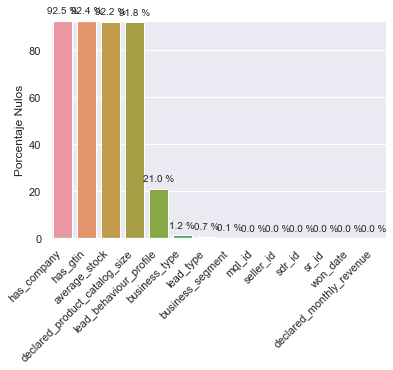

In [7]:
# cuantos datos nulos por columna se encuentran
valores=Closed_deals.isna().sum().sort_values(ascending=False)*100/Closed_deals.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- De un total de 842 registros las columnas has_company, has_gtin, average_stock y declared_product_catalog_size tiene mas del 90 % de sus datos faltantes
- Esta tabla no aporta datos muy relevantes

## Customers

In [8]:
# carga del dataset y muestreo de 10 registros aleatorios
Customers = pd.read_csv('Datasets_original/olist_customers_dataset.csv')
Customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
44191,bc3c9c45fe3fd83f49adbcbf50daa3da,e72bbc364013bd2f23ace1b4e3c43be6,89252,jaragua do sul,SC
25496,e76a54bc0d393fd9e7d558e9f981e426,97d80b89a88e9d7a2ac69d164a5ed65e,30170,belo horizonte,MG
16341,fb5daac77831c1a8947d7228df0ef463,47c0c269d03b5e24138898e546c85a03,96010,pelotas,RS
84578,4128467caa12d62fe47421a1a02ddb5b,1dc9d4d7bea77b585eb404951d81c420,12512,guaratingueta,SP
81554,6bb872be660f753375ecc8ed90a1f99d,c03197ab6a74c1cb976c078127366700,5271,sao paulo,SP
49166,a32b6f71f1fab7f00b04a1e0eaf34e9a,04f5c77d3b874a3faa6fce234550448e,3378,sao paulo,SP
5112,5ad8b0b80efc45a52eceb54775c616fc,f8bbcdb4bd053103052cd5501713e845,2404,sao paulo,SP
69294,8a651f62fa340c6bb5309fac465d7ef6,a759a9247088f5af1a7f00ddf6d95133,25820,tres rios,RJ
82963,649fd102478f2df9972510dfa46c40c2,33e2e4bb22badff291de6f2302f01579,75064,anapolis,GO
46756,13893ae039f4f52e3aac9330b99c2a90,a4e8a2fb3d4d783c8eec5bf1ea80d3c6,12500,guaratingueta,SP


In [9]:
# tamaño del dataset
Customers.shape

(99441, 5)

In [10]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
# descripcion de las columnas numéricas 
Customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Customers.describe(include=['O'])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


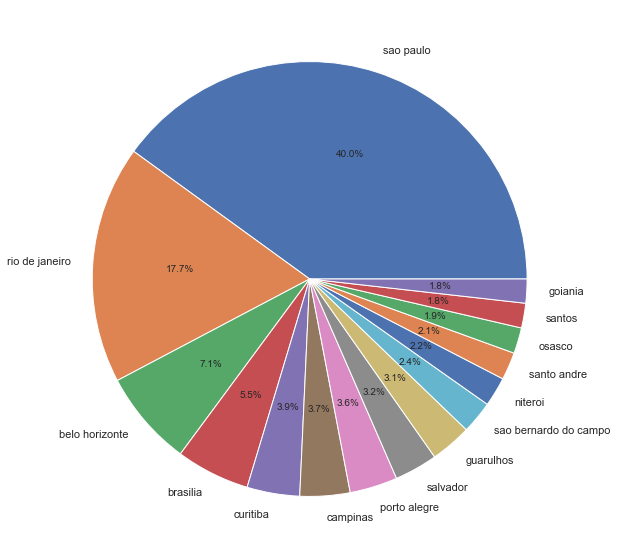

In [13]:
#15 ciudades con mayor cantidad de clientes
val=Cantidad_por_ciudad=Customers.groupby(["customer_city"]).count().sort_values(by=["customer_id"],ascending=False).drop_duplicates("customer_id")["customer_id"].head(15)
plot = val.plot.pie(ylabel="",subplots=True, figsize=(20, 10),autopct='%1.1f%%')

- Analizando Customers faltan datos de customers_unique_id que no hay referencia de como fueron creados esos codigos
- Esta tabla se puede utilizar para saber de qué ciudades provienen los consumos

## Geolocation

In [14]:
# carga del dataset y muestreo de 10 registros aleatorios
Geolocation = pd.read_csv('Datasets_original/olist_geolocation_dataset.csv')
Geolocation.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
559627,31035,-19.898344,-43.921363,belo horizonte,MG
446848,22221,-22.930533,-43.179269,rio de janeiro,RJ
651841,38600,-17.234413,-46.870211,paracatu,MG
178167,7050,-23.464944,-46.547910,guarulhos,SP
491265,25942,-22.582328,-43.002540,guapimirim,RJ
138527,5679,-23.601111,-46.702085,sao paulo,SP
200603,8285,-23.555659,-46.472927,são paulo,SP
473650,24220,-22.899014,-43.106746,niteroi,RJ
11525,1443,-23.571583,-46.689674,sao paulo,SP
255510,11442,-23.983688,-46.214901,guaruja,SP


In [15]:
# tamaño del dataset
Geolocation.shape

(1000163, 5)

In [16]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
# descripcion de las columnas numéricas
Geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [18]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Geolocation.describe(include=['O'])

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


- Esta tabla puede servir para ubicar las ciudades correctamente en objeto mapa del Dashboard.

## Marketing

In [19]:
# carga del dataset y muestreo de 10 registros aleatorios
Marketing = pd.read_csv('Datasets_original/olist_marketing_qualified_leads_dataset.csv')
Marketing.sample(10)

,mql_id,first_contact_date,landing_page_id,origin
3859,434c2eb8627ed4e1a0a4f0ee5d6022aa,2018-03-22,0d6bc3c00e4e64927cae2e8d9c6a0b9b,paid_search
1749,7af61e5f524cea0e7dab3a8dfc4c00d6,2018-01-31,88740e65d5d6b056e0cda098e1ea6313,social
1045,0c0628d88467dd0051bcd8b2565b619d,2018-02-26,0e5a178e3cd2368607f3e72f46140476,unknown
4593,8f37d35601db1ec603ddcd88d874e73e,2018-04-15,58326e62183c14b0c03085c33b9fdc44,social
7766,456a517146c2c0321b45c98540856387,2018-02-14,30077c17f2ec5010a82e37ad8925b95f,organic_search
5269,5e54918976bb01299a2eca9319c229d4,2017-07-31,e492ee5eaf1697716985cc6f33f9cd9b,unknown
7772,2436974dd1c97a19bbc99fc38204feea,2018-01-17,88740e65d5d6b056e0cda098e1ea6313,social
4733,670f33f3cfb5217bcf008786165f1dc7,2017-10-07,88740e65d5d6b056e0cda098e1ea6313,social
6416,a08b8a9e3da653c1147cabd415627a4e,2017-10-17,b76ef37428e6799c421989521c0e5077,unknown
4890,515b37a5bb29c8ea5c7d919139b22971,2018-05-30,330b9d44078a1ae5a221d655dcb77afa,display


In [20]:
# tamaño del dataset
Marketing.shape

(8000, 4)

In [21]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [22]:
# descripcion de las columnas numéricas
Marketing.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [23]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Marketing.describe(include=['O'])

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [24]:
# cuantos datos nulos por columna se encuentran
Marketing.isna().sum()*100/Marketing.shape[0]

mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
origin                0.75
dtype: float64

- Esta tabla no aporta datos significativos para el análisis que queremos realizar

## Order_items

In [25]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_items = pd.read_csv('Datasets_original/olist_order_items_dataset.csv')
Order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
103960,ec1ecce6ed2f4a351a045a8de255e3af,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2017-09-21 10:10:20,89.90,14.95
62197,8dfe2458a3fe7978343edf962990b9ba,1,84c79830527ae823029ee6b904cf948c,8bb48dc19fccaa8613b6229bf7f452a2,2018-07-16 18:43:54,34.84,19.80
38121,567cb4e829743d8cc4dd3dc72b6d7136,1,7329db39e452f3fa1b4f8285055a8e36,968268a686aa05d1f529fb07dff08130,2018-06-14 17:35:25,176.60,9.00
28598,411b8901b201804f134429744b17b686,1,fa4e8255202fd921350a6fc716710dae,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-09-25 19:05:21,248.99,9.00
45910,68354b9bbb79df0863b0138440c9e1b1,1,5fb00b8c5c7ec5ea3a19223f6e8d6b40,89ad3263c0931c47f976d7c5778e60f6,2018-06-29 10:15:23,31.60,7.48
661,0188ca1fe398161f0f310fec985ac155,1,6ed58ce8373b3d0c7704df9daf21e4d8,5b2e94f2c22b39ccc24d34ad0f669672,2018-07-05 02:52:29,66.00,43.40
25214,3961a71512408632c7b76c129c0272c6,1,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-02-01 23:18:17,108.00,16.52
65228,95123e166ec553efe0364686f36d5ac4,1,3f879754671b3c5cc288f787246b10a1,670a9dda115b5a88b18cfadee8de2332,2018-06-15 19:30:17,89.90,13.07
91342,cf49cb20f726614d8f2bbd281489b0b3,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-07-26 09:43:57,69.99,13.15
2539,05b6dcf764ce18df76138d88dba0aa7d,1,937ac3a2f4aec64b560e6423fb50aee9,9674754b5a0cb32b638cec001178f799,2017-10-09 06:34:06,17.80,16.92


In [26]:
# tamaño del dataset
Order_items.shape

(112650, 7)

In [27]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# descripcion de las columnas numéricas
Order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<AxesSubplot:xlabel='price'>

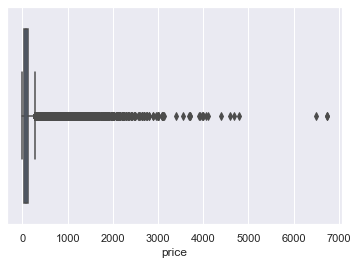

In [29]:
# Detección de outliers
sns.boxplot(x=Order_items.price)

In [30]:
# Rango intercuartil
IQR = Order_items.price.quantile(0.75) - Order_items.price.quantile(0.25)
lower_lim = Order_items.price.quantile(0.25) - 2.5 * IQR
upper_lim = Order_items.price.quantile(0.75) + 2.5 * IQR
outliers_low = Order_items.price < lower_lim
outliers_up = Order_items.price > upper_lim
print("Total de outliers:",(len(Order_items.price[outliers_low]) + len(Order_items.price[outliers_up])))
Order_items[~(outliers_low | outliers_up)].shape

Total de outliers: 5035


(107615, 7)

In [31]:
# Z-Score
z = np.abs(stats.zscore(Order_items.price))
outliers = Order_items.price[(z > 3)].index
print("Total de outliers:", len(outliers))
Order_items.drop(outliers).shape

Total de outliers: 1966


(110684, 7)

In [32]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_items.describe(include=['O'])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [33]:
# Revisión de la columna order_item_id; expresa la cantidad incremental de artículos presentes en una misma orden
Order_items[['order_id', 'order_item_id']].groupby(['order_id']).count().sort_values('order_item_id', ascending=False)

,order_item_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [34]:
# Revisión de la columna product_id; cuál es el producto más vendido
Order_items[['order_id','product_id']].groupby(['product_id']).count().sort_values('order_id', ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [35]:
# Revisión de la columna product_id; cuánto facturó el producto más vendido
Order_items[['price','product_id']].groupby(['product_id']).sum().sort_values('price', ascending=False)

,price
product_id,
bb50f2e236e5eea0100680137654686c,63885.00
6cdd53843498f92890544667809f1595,54730.20
d6160fb7873f184099d9bc95e30376af,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
99a4788cb24856965c36a24e339b6058,43025.56
...,...
2e8316b31db34314f393806fd7b6e185,2.99
680cc8535be7cc69544238c1d6a83fe8,2.90
8a3254bee785a526d548a81a9bc3c9be,2.55


In [36]:
# Revisión de la columna seller_id; cuál es el vendedor con más órdenes
Order_items[['order_id','seller_id']].groupby(['seller_id']).count().sort_values('order_id', ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [37]:
# Revisión de la columna seller_id; cuánto sumaron las órdenes de cada vendedor
Order_items[['price','seller_id']].groupby(['seller_id']).sum().sort_values('price', ascending=False)

,price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
53243585a1d6dc2643021fd1853d8905,222776.05
4a3ca9315b744ce9f8e9374361493884,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,194042.03
7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


## Order_payments

In [38]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_payments = pd.read_csv('Datasets_original/olist_order_payments_dataset.csv');

In [39]:
Order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
12244,647255bbedcdf748e7496180374b0dfe,1,credit_card,1,28.09
86151,c4421eb740558d775cda9f659561f4c0,1,credit_card,9,120.97
88787,71394edb269e67b8431cc1c355cc53df,1,credit_card,8,87.92
37362,90e258ad907d8401c4f1107ea9e55f1b,1,credit_card,5,130.91
36180,ba9bd6945bfd574bc44edb1a6276a198,1,credit_card,1,66.81
3412,b3bdaf64ae3778709ebf333ae90f1673,1,credit_card,3,35.31
68467,dca1c8442dbaa43f544c8f51160d42ca,1,boleto,1,52.19
79930,464bdc55a2b4838f5d83f20f181ff858,1,credit_card,1,52.05
64111,3473b2ac470644fed5ff35254ec7a759,1,boleto,1,102.18
71072,b1057b71c52a710fc9f588bb5eb702d9,1,boleto,1,119.81


In [40]:
# tamaño del dataset
Order_payments.shape

(103886, 5)

In [41]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
# descripcion de las columnas numéricas
Order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [43]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_payments.describe(include=['O'])

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


- El comportamiento de los pagos. La utilidad dependerá de la propuesta del PO

## Order_reviews

In [44]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_reviews = pd.read_csv('Datasets_original/olist_order_reviews_dataset.csv')
Order_reviews.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
74729,a51b17cc0ae35deec0466cbf057b6700,d3d6fd64df1cf1428ea9f88aaabb4713,3,Talvez recomendaria,A empresa deveria responder aos e-mail dos cli...,2018-05-17 00:00:00,2018-05-21 17:40:50
68106,7d785ed51e4bd0880cb37cbd33151054,071429b44ba39c70ea22550070670c00,5,NaN,"ótimo produto, atendeu as exigências.",2017-11-02 00:00:00,2017-11-06 11:30:25
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
45962,c5bb30c3c8492b07f989f38c484fc7c7,b4351b639f2b08615cf0af316b7fd590,5,NaN,NaN,2017-11-14 00:00:00,2017-11-16 21:20:42
8343,d4adfea6ec8fc541be646d30d00f63f5,c765801ff1022b82d664e0a1b114d4b2,4,NaN,"As pulseiras vieram corretas, iguais a da foto...",2017-10-17 00:00:00,2017-10-18 10:49:51
89642,0dbc79e0cb36f3baf6369984bfe96c11,008819c6d5f6da6fa5cd9d50ca927cf4,3,NaN,NaN,2018-08-08 00:00:00,2018-08-09 14:21:40
78500,efd243bb20d2a8070dcda402acad0b64,6fb94eba66b44dad1973e9109f89136d,4,NaN,Chegou tudo em ordem.,2017-06-01 00:00:00,2017-06-02 06:20:54
85804,c6ded88e64c168b5ca7984f318fb159d,46e2c9316a4e671b4b4ffb25154c28c5,2,RECOMENDO,Recebi o produto faltando 02 (duas) luminárias,2018-04-25 00:00:00,2018-04-27 14:17:31
84541,fdd3fea45535b3b6e2a9763bdf22fcd6,be555543375e799bd0f439ffc16134ab,1,Ruim,Comprei duas balanças e so entregaram uma!!,2018-07-06 00:00:00,2018-07-06 22:30:11
82072,6dc9c0c8d5e889435cfd771527956420,6007efb03b652fb947155d0dd1001098,3,NaN,.,2018-03-27 00:00:00,2018-03-28 10:20:22


In [45]:
# tamaño del dataset
Order_reviews.shape

(99224, 7)

In [46]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
# descripcion de las columnas numéricas
Order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [48]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_reviews.describe(include=['O'])

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


In [49]:
# cuantos datos nulos por columna se encuentran
Order_reviews.isna().sum()*100/Order_reviews.shape[0]

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

- La utilidad de esta tabla dependerá del objetivo propuesto.

## Orders

In [50]:
# carga del dataset y muestreo de 10 registros aleatorios
Orders = pd.read_csv('Datasets_original/olist_orders_dataset.csv')
Orders.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
66538,bb01789fc0271409b394c7b283e9dd29,ac3e01509ab5a9e7bb1bb344048ef81d,delivered,2018-08-07 12:08:49,2018-08-07 12:24:47,2018-08-09 14:22:00,2018-08-14 22:13:42,2018-08-28 00:00:00
87116,65afe7bafea88efc7a99cd3cf3838bed,70aecb98ec965a174733a3021c64373b,delivered,2017-12-06 09:41:25,2017-12-06 09:50:23,2017-12-07 20:28:23,2017-12-14 21:35:12,2018-01-11 00:00:00
23365,f461365902fbac0de671877edd6649f1,e966362139bcbf3adfc02f892f0483be,delivered,2018-04-14 21:03:20,2018-04-14 21:15:18,2018-04-17 14:08:39,2018-04-24 14:05:33,2018-05-17 00:00:00
51179,a2eb5d639e60dc92388b4177edfc52a4,91ab1bd74f89f434cbec29de5cb04181,delivered,2018-05-23 09:06:49,2018-05-23 09:36:29,2018-05-23 13:01:00,2018-06-01 17:25:44,2018-06-27 00:00:00
59114,48d30a78681848a5caa890b0acc9ad72,4edf532487459eda21dd6ee099adf329,delivered,2018-03-15 20:58:52,2018-03-15 21:10:35,2018-03-22 11:04:25,2018-04-13 17:54:37,2018-04-10 00:00:00
47500,2cbc5b81184dcc5a9a134f8eecdaa825,f074190ffb3794d0aeef9a074077c0b4,delivered,2017-04-17 14:32:21,2017-04-17 14:45:30,2017-04-18 15:44:27,2017-05-07 08:17:30,2017-05-09 00:00:00
57986,d8970edba4396fca8d53449f1942a530,b48e9a32f934ca879a11ccc405e5d694,delivered,2018-03-13 17:10:16,2018-03-13 18:09:58,2018-03-14 19:03:55,2018-03-27 20:53:29,2018-03-23 00:00:00
91277,5719565c136a2498b696dba86c086251,b7aefa4277bb9716bdf005f558fbf84d,delivered,2018-06-11 14:50:15,2018-06-11 15:19:57,2018-06-12 14:03:00,2018-06-14 20:42:56,2018-07-04 00:00:00
10851,e0af6cabd937112402ed8cecb025d15d,e39da63e35dd7c9707e9870cba38e450,delivered,2017-02-23 15:46:42,2017-02-23 15:55:20,2017-02-24 09:47:32,2017-03-03 10:51:53,2017-03-16 00:00:00
79138,2b9f86a52457f652ac6b282b5dde09b2,db781c2a257ae6fb647104d94c9af367,delivered,2018-06-03 14:50:19,2018-06-04 14:51:09,2018-06-05 09:43:00,2018-06-07 23:27:24,2018-07-05 00:00:00


In [51]:
# tamaño del dataset
Orders.shape

(99441, 8)

In [52]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
# descripcion de las columnas numéricas
Orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [54]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Orders.describe(include=['O'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


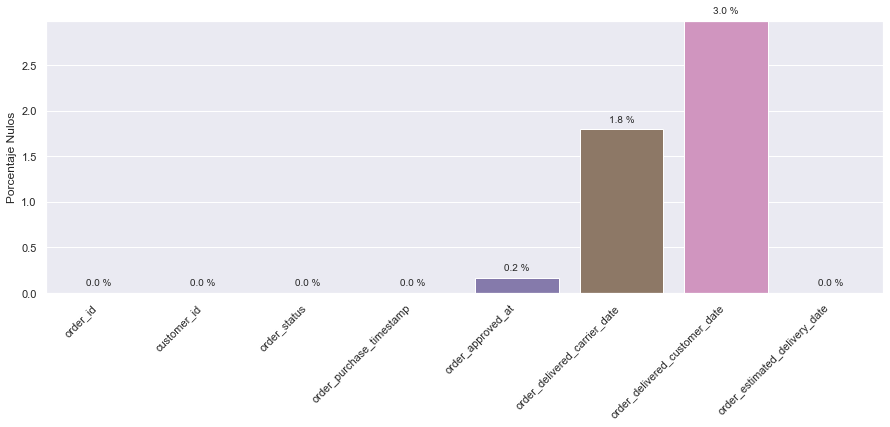

In [55]:
# cuantos datos nulos por columna se encuentran
valores=Orders.isna().sum()*100/Orders.shape[0]

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Products

In [56]:
# carga del dataset y muestreo de 10 registros aleatorios
Products = pd.read_csv('Datasets_original/olist_products_dataset.csv')
Products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
22342,093f7389fa2eccda5e86add8da4aa19e,cama_mesa_banho,40.0,718.0,1.0,2000.0,38.0,20.0,25.0
25261,ae760abaecd982ddef888b342412ee8d,telefonia,57.0,361.0,3.0,150.0,21.0,7.0,14.0
20274,014a8a503291921f7b004a5215bb3c36,bebes,37.0,497.0,4.0,150.0,16.0,7.0,11.0
1245,16447aab914c7ecbeb5b7b7518ff3d94,moveis_decoracao,63.0,395.0,1.0,150.0,25.0,5.0,20.0
14282,bf5fe03d1ac5be6407a279b3681992ed,beleza_saude,40.0,1247.0,1.0,700.0,22.0,22.0,22.0
20941,4d68f0bb076a44142f1d1725ba3b3bc8,fashion_bolsas_e_acessorios,32.0,623.0,6.0,1000.0,42.0,42.0,14.0
24120,25115416bba55bd33ecccbc480ec7a81,relogios_presentes,57.0,349.0,3.0,300.0,16.0,8.0,11.0
29257,c8c073a1cae6a98799d7581958ede514,eletrodomesticos_2,43.0,1009.0,2.0,6025.0,32.0,35.0,35.0
19419,6845447c5d4495dcddca6e6b494df3e7,cama_mesa_banho,55.0,1337.0,4.0,1950.0,40.0,6.0,35.0
17293,d52d7fb0d4ea10cd52baa3255c5c0a34,esporte_lazer,58.0,474.0,5.0,1200.0,20.0,8.0,20.0


In [57]:
# tamaño del dataset
Products.shape

(32951, 9)

In [58]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [59]:
# descripcion de las columnas numéricas
Products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [60]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Products.describe(include=['O'])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


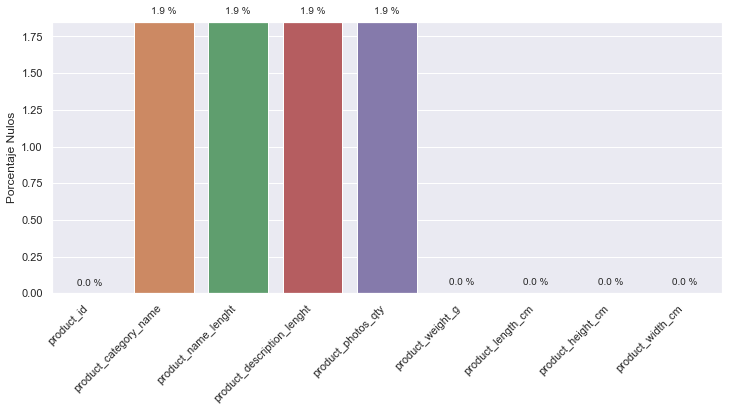

In [61]:
# cuantos datos nulos por columna se encuentran
valores=Products.isna().sum()*100/Products.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Sellers

In [62]:
# carga del dataset y muestreo de 10 registros aleatorios
Sellers = pd.read_csv('Datasets_original/olist_sellers_dataset.csv')
Sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2967,282c7480173bb9c01dd41cc739fec010,4795,sao paulo,SP
2149,184a67a8f9f63234d3a92340bbdb727f,89220,joinville,SC
1336,bd65d163ded559eb90a10cd09fec178f,3526,sao paulo,SP
1896,070d165398b553f3b4b851c216b8a358,3916,sao paulo,SP
2808,1835b56ce799e6a4dc4eddc053f04066,14940,ibitinga,SP
625,7315baebc0572ff220d226283dc66728,13560,sao carlos,SP
1224,1d8dbc4f32378d715c717c1c1fc57bae,86706,arapongas,PR
2966,70eea00b476a314817cefde4aad4f89a,13250,itatiba,SP
2819,38874e327ce94d11390b96eb42d61928,8577,itaquaquecetuba,SP
579,b6e1504972665f739dec4facb9943775,13405,piracicaba,SP


In [63]:
# tamaño del dataset
Sellers.shape

(3095, 4)

In [64]:
# revisamos la distribución de las ciudades (mejor con un gráfico)
Sellers.seller_city.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [65]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [66]:
# descripcion de las columnas numéricas
Sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [67]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Sellers.describe(include=['O'])

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


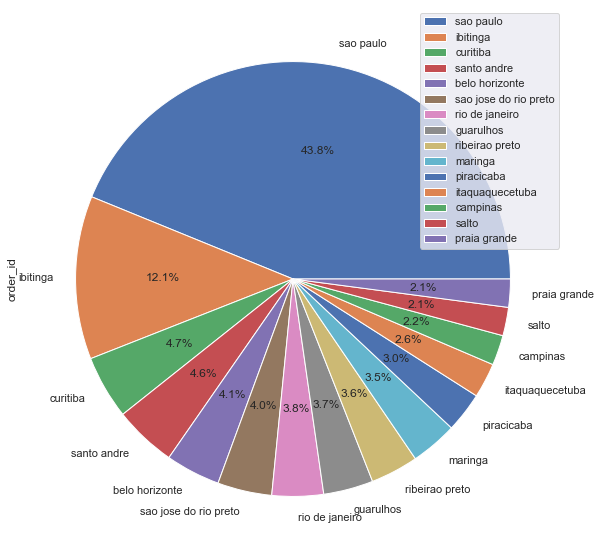

In [107]:
# Revisamos uniendo las tablas, cuál es la ciudad con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_city','order_id']].groupby(['seller_city']).count().sort_values('order_id', ascending=False).head(15)

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

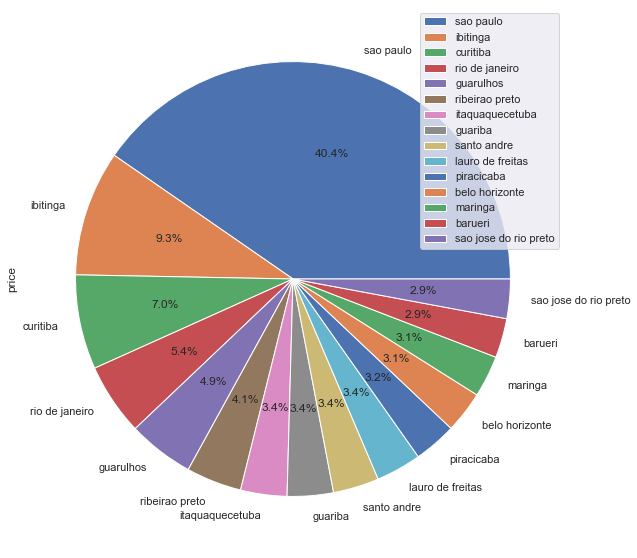

In [69]:
# Revisamos uniendo las tablas, cuál es la ciudad con el monto mayor en ventas
val=Sellers.merge(Order_items)[['seller_city','price']].groupby(['seller_city']).sum().sort_values('price', ascending=False).head(15)
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

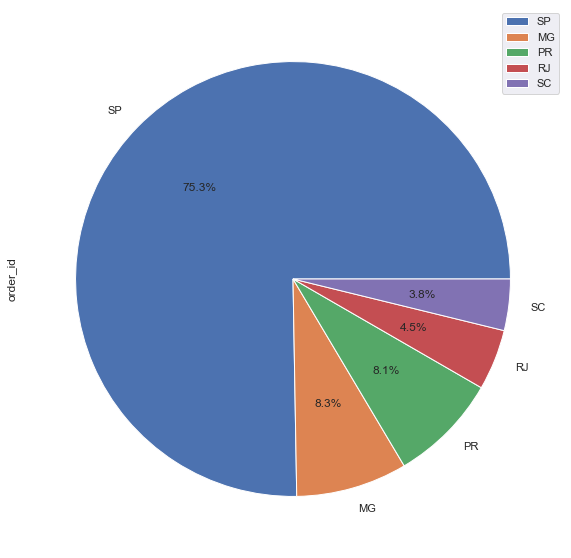

In [109]:
# Revisamos uniendo las tablas, cuál es la provincia con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_state','order_id']].groupby(['seller_state']).count().sort_values('order_id', ascending=False).head()

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

## Product_category_name_translation

In [70]:
# carga del dataset y muestreo de 10 registros aleatorios
Product_category_name_translation = pd.read_csv('Datasets_original/product_category_name_translation.csv')
Product_category_name_translation.sample(10)

,product_category_name,product_category_name_english
47,moveis_quarto,furniture_bedroom
33,eletrodomesticos,home_appliances
58,bebidas,drinks
14,brinquedos,toys
64,cds_dvds_musicais,cds_dvds_musicals
18,eletroportateis,small_appliances
51,fashion_esporte,fashion_sport
28,fashion_roupa_masculina,fashion_male_clothing
70,seguros_e_servicos,security_and_services
27,construcao_ferramentas_jardim,costruction_tools_garden


In [71]:
# tamaño del dataset
Product_category_name_translation.shape

(71, 2)

In [72]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [73]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Product_category_name_translation.describe(include=['O'])

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Tiempo de entrega producto

In [74]:
#En la columna orders se puede agregar una nueva columna que contenga la cantidad de dias entre
#la aprobacion de una compra y su entrega al cliente.

Orders['Tiempo_entrega'] = pd.to_datetime(Orders["order_approved_at"]) - pd.to_datetime(Orders['order_delivered_customer_date'])

#Transformar los valores a solo días
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].apply(lambda x: x.days + (x.seconds / 86400)) 

#Cambiar el tipo de datos de la columna a números decimales
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].astype(float) 


print(Orders['Tiempo_entrega'])


0        -8.429144
1       -12.502292
2        -9.382708
3       -13.196331
4        -2.830938
           ...    
99436    -8.218009
99437   -22.185637
99438   -24.847234
99439   -17.080938
99440    -7.075023
Name: Tiempo_entrega, Length: 99441, dtype: float64


## Combinacion de datasets y creacion de matriz de correlacion

In [75]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Closed_deals,on="seller_id",how="left")

In [76]:
#Lista de columnas a las que se le aplica label encoder
list_columns = datasets_combinados.select_dtypes(include='object').columns


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Se aplica label encoder a todas las columnas
for col in list_columns:
    datasets_combinados[col] = le.fit_transform(datasets_combinados[col])

<AxesSubplot:>

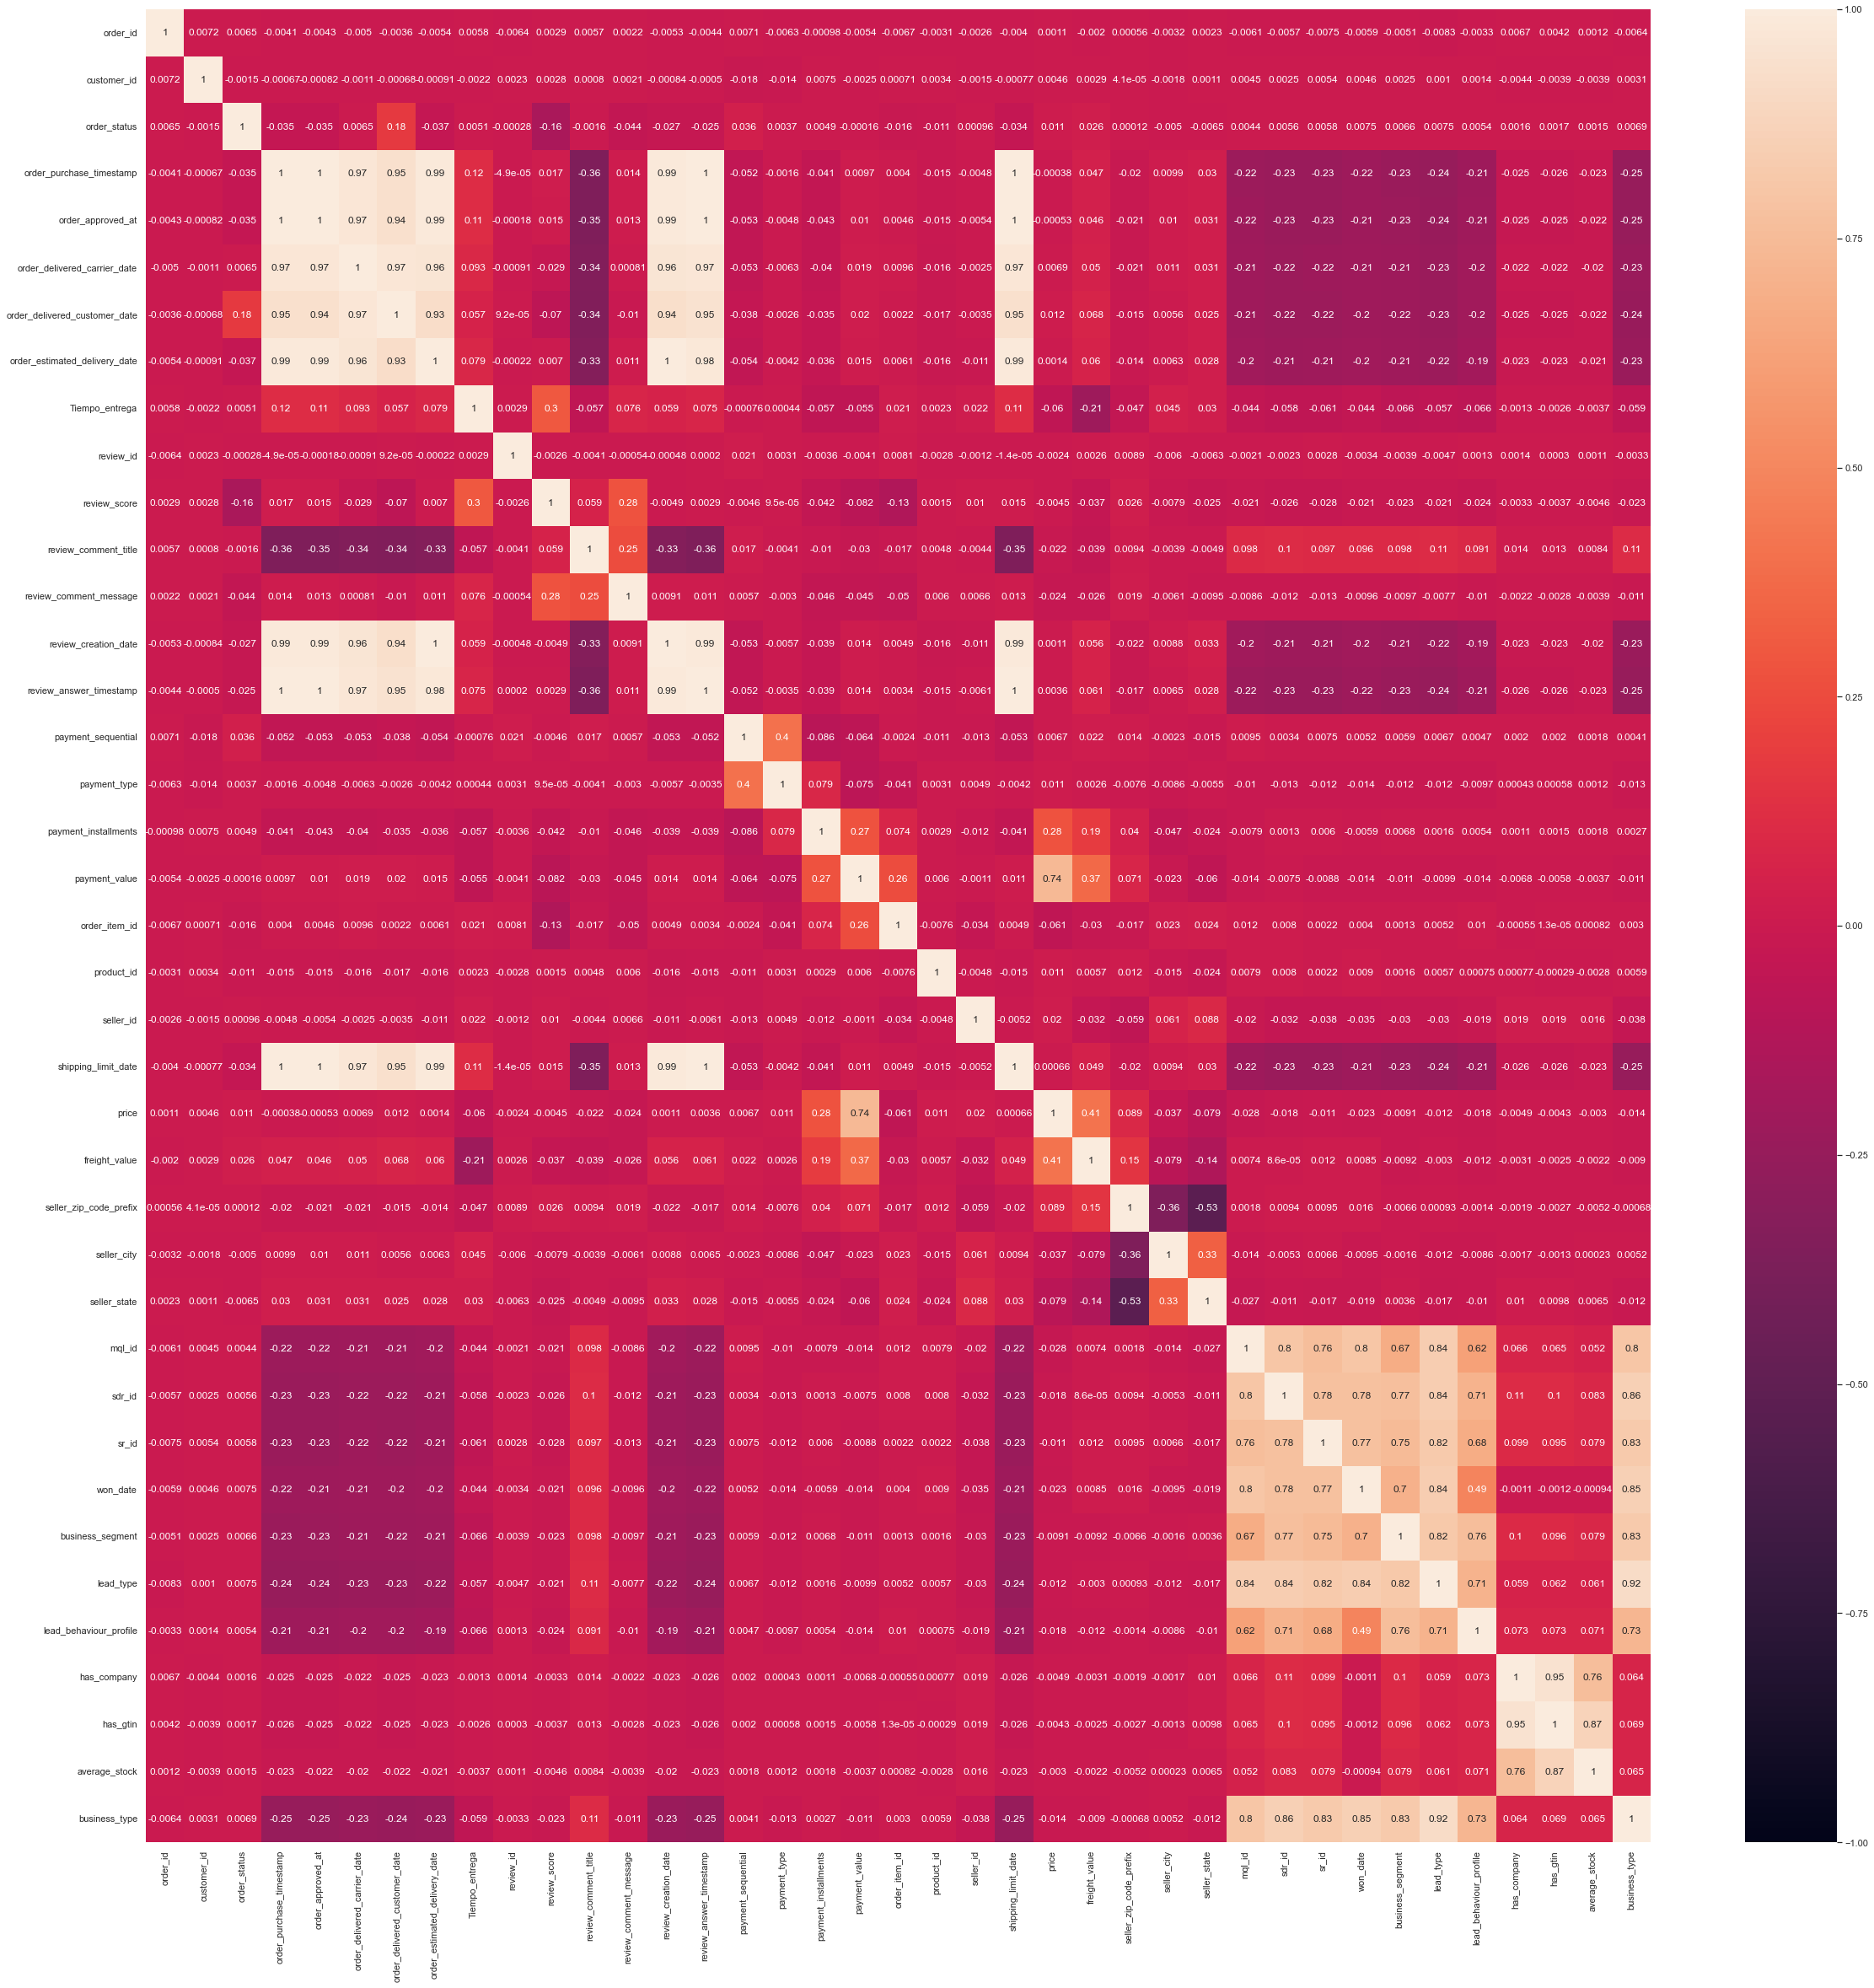

In [77]:
#se crea la matriz de correlacion
corr=datasets_combinados.drop(["declared_monthly_revenue","declared_product_catalog_size"],axis=1).corr()

#se grafica con un mapa de calor
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

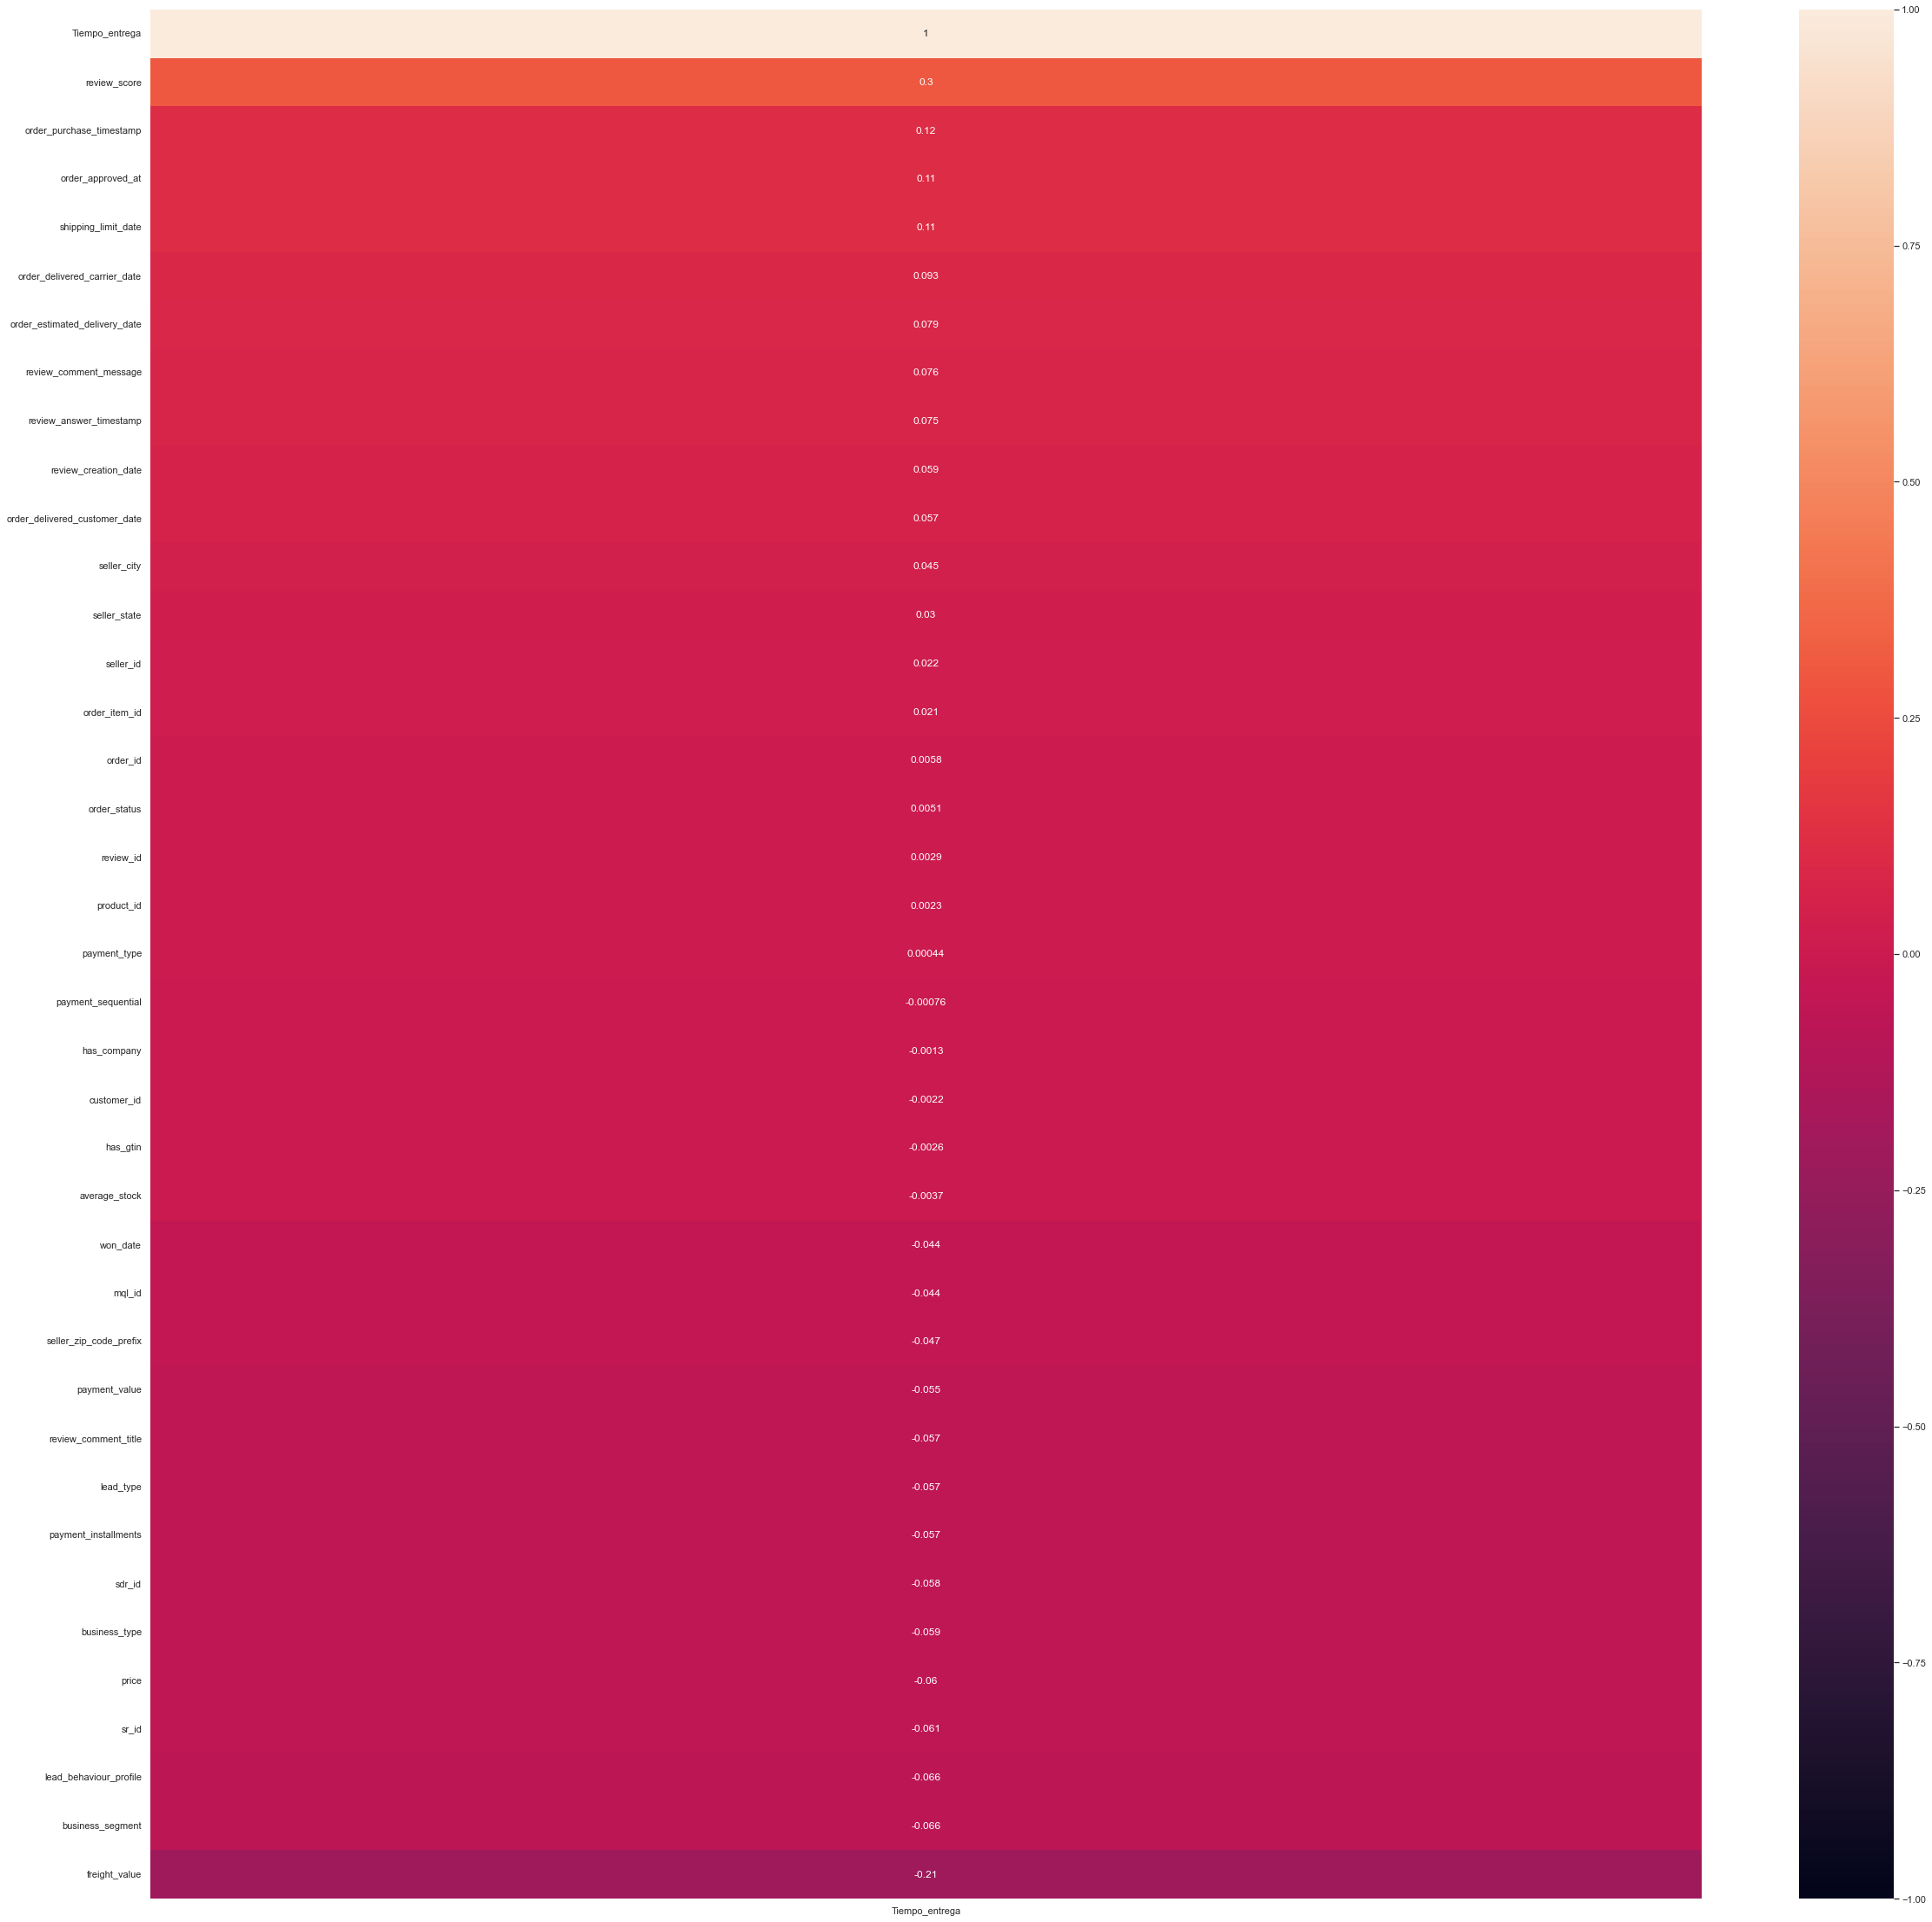

In [78]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="Tiempo_entrega",ascending=False)[["Tiempo_entrega"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

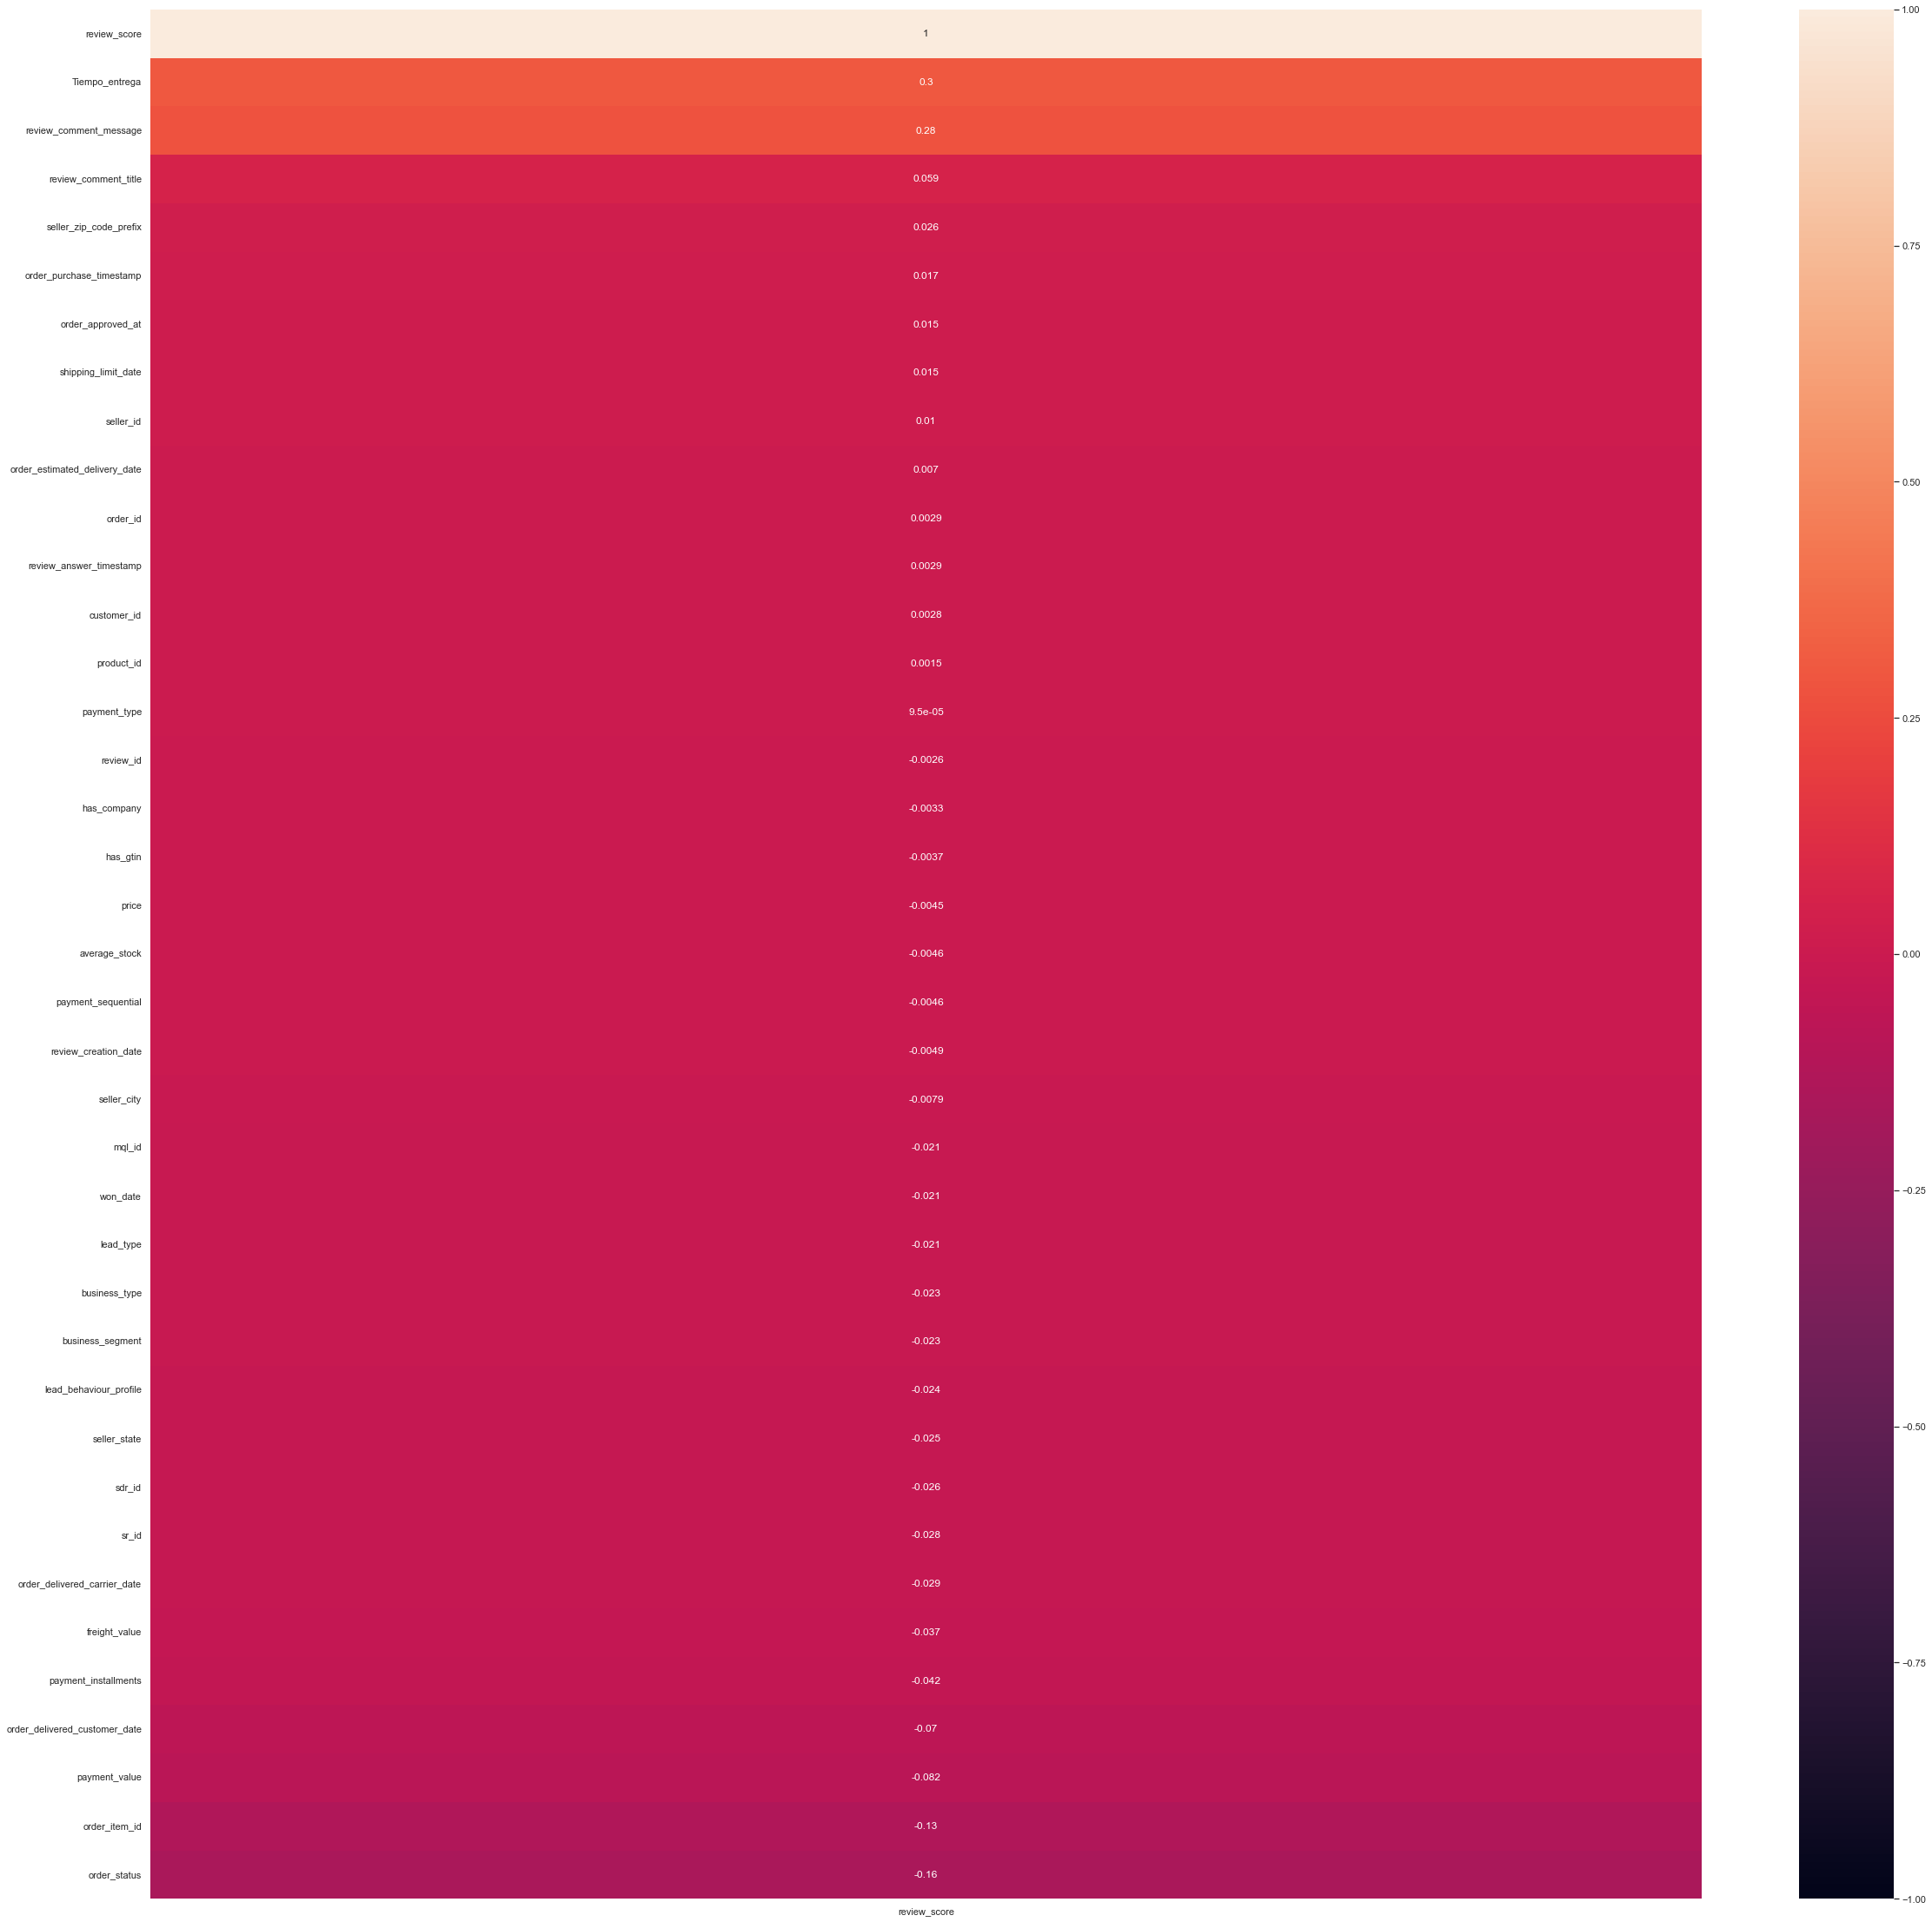

In [79]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="review_score",ascending=False)[["review_score"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)

## Tabla valoración vendedor

Armaremos una tabla que nos permita darle una valoración a cada vendedor, basado en diferentes unidades:

- Location (?)
- Amount of distinct products
- Type of products (?)
- Time to fill order
- Review score
- Number of orders
- Number of sales
- Gross income
- Net income

In [110]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Products,on="product_id")

In [111]:
datasets_combinados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Tiempo_entrega,review_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-8.429144,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-8.429144,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-8.429144,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,-2.777396,b46f1e34512b0f4c74a72398b03ca788,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,-4.990810,dc90f19c2806f1abba9e72ad3c350073,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [112]:
# Se seleccionan columnas con ID para modificar
columnas = [0,1,9,19,20,21]
datasets_combinados.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Tiempo_entrega', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [113]:
#Se aplica label encoder a las columnas de ID
for col in columnas:
    datasets_combinados[datasets_combinados.columns[col]] = le.fit_transform(datasets_combinados[datasets_combinados.columns[col]])

In [146]:
Valoracion = pd.DataFrame(columns=['seller_id'])

In [147]:
Valoracion.seller_id = datasets_combinados.seller_id.unique()
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_city']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_state']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'product_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'Tiempo_entrega']].groupby(['seller_id']).mean(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'review_score']].groupby(['seller_id']).mean(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'order_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'price']].groupby(['seller_id']).sum(), on= 'seller_id')

In [148]:
Valoracion.rename({'product_id':'distinct_prod', 'Tiempo_entrega':'delivery_avg',\
                   'review_score':'review_avg', 'order_id':'total_orders', 'price':'total_income'}, axis=1)

,seller_id,seller_city,seller_state,distinct_prod,delivery_avg,review_avg,total_orders,total_income
0,629,maua,SP,58,-6.981012,4.431034,58,2548.80
1,2724,maua,SP,229,-8.890900,4.065502,229,12520.10
2,476,belo horizonte,SP,126,-6.209130,4.579365,126,13544.95
3,2882,sao goncalo,RJ,142,-12.263502,4.345070,142,16443.10
4,64,santo andre,SP,66,-9.770239,4.348485,66,7889.90
...,...,...,...,...,...,...,...,...
3085,2236,porto ferreira,SP,1,-3.950752,5.000000,1,79.00
3086,1627,blumenau,SC,1,NaN,1.000000,1,19.70
3087,2546,americana,SP,1,-9.474398,5.000000,1,399.00
3088,2874,sao paulo,SP,1,-21.066539,4.000000,1,219.90


In [149]:
Valoracion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seller_id       3090 non-null   int32  
 1   seller_city     3090 non-null   object 
 2   seller_state    3090 non-null   object 
 3   product_id      3090 non-null   int64  
 4   Tiempo_entrega  2965 non-null   float64
 5   review_score    3090 non-null   float64
 6   order_id        3090 non-null   int64  
 7   price           3090 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 205.2+ KB
